<a href="https://colab.research.google.com/github/mvharsh/Deep-Learning/blob/main/CNN/CNN_Dog_Breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np

In [ ]:
batch_size = 32
input_size = (150, 150)

In [ ]:
train_dir = '/content/drive/MyDrive/Dog Breed/Train'
test_dir = '/content/drive/MyDrive/Dog Breed/Test'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical')

Found 180 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [ ]:
class_names = list(train_generator.class_indices.keys())
print("Class names:", class_names)

Class names: ['Affenhuahua dog', 'Afgan Hound dog', 'Akita dog', 'Alaskan Malamute dog']


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)
)

Epoch 1/20
6/6 [==============================] - 16s 2s/step - loss: 1.4588 - accuracy: 0.2056 - val_loss: 1.3854 - val_accuracy: 0.2500
Epoch 2/20
6/6 [==============================] - 13s 2s/step - loss: 1.3885 - accuracy: 0.2389 - val_loss: 1.3841 - val_accuracy: 0.2500
Epoch 3/20
6/6 [==============================] - 13s 2s/step - loss: 1.3842 - accuracy: 0.2722 - val_loss: 1.3818 - val_accuracy: 0.4000
Epoch 4/20
6/6 [==============================] - 17s 3s/step - loss: 1.3774 - accuracy: 0.3222 - val_loss: 1.3721 - val_accuracy: 0.3500
Epoch 5/20
6/6 [==============================] - 20s 3s/step - loss: 1.3601 - accuracy: 0.3944 - val_loss: 1.3564 - val_accuracy: 0.3500
Epoch 6/20
6/6 [==============================] - 15s 2s/step - loss: 1.3319 - accuracy: 0.4000 - val_loss: 1.3124 - val_accuracy: 0.4500
Epoch 7/20
6/6 [==============================] - 19s 3s/step - loss: 1.2881 - accuracy: 0.4111 - val_loss: 1.2604 - val_accuracy: 0.4500
Epoch 8/20
6/6 [==================

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1/1 [==============================] - 1s 647ms/step - loss: 0.9483 - accuracy: 0.7000
Test Loss: 0.9482587575912476
Test Accuracy: 0.699999988079071


In [ ]:
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

1/1 [==============================] - 1s 1s/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_pred, y_true, target_names=class_names))


Classification Report:
                      precision    recall  f1-score   support

     Affenhuahua dog       0.00      0.00      0.00         5
     Afgan Hound dog       0.00      0.00      0.00         0
           Akita dog       0.00      0.00      0.00         6
Alaskan Malamute dog       0.40      0.22      0.29         9

            accuracy                           0.10        20
           macro avg       0.10      0.06      0.07        20
        weighted avg       0.18      0.10      0.13        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_pred, y_true))

Confusion Matrix:
[[0 2 2 1]
 [0 0 0 0]
 [4 0 0 2]
 [1 3 3 2]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

Enter the path to the uploaded image: /content/drive/MyDrive/Dog Breed/Test/Akita dog/Image_47.jpg
1/1 [==============================] - 0s 118ms/step


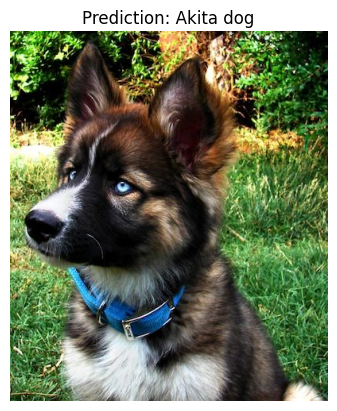

In [ ]:
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array / 255.0

def predict_img(image_path):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_names[predicted_class_index]
    return predicted_class_name

uploaded_image_path = input("Enter the path to the uploaded image: ")
prediction = predict_img(uploaded_image_path)

img = image.load_img(uploaded_image_path)
plt.imshow(img)
plt.title(f"Prediction: {prediction}")
plt.axis('off')
plt.show()